In [7]:
! kaggle datasets download -d prathamtripathi/drug-classification

  0%|                                               | 0.00/1.68k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.68k/1.68k [00:00<00:00, 2.99MB/s]


In [9]:
import zipfile 
with zipfile.ZipFile("drug-classification.zip") as zip_ref:
    zip_ref.extractall("/Datasets")

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv("/Datasets/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


/root/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/root/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BP', ylabel='Age'>

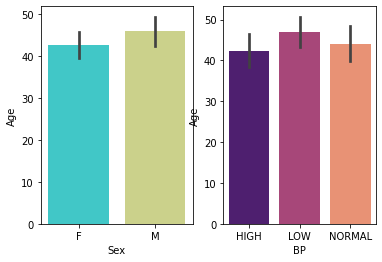

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=2)
sns.barplot(data['Sex'],data['Age'],palette="rainbow",ax=ax[0])
sns.barplot(data['BP'],data['Age'],palette="magma",ax=ax[1])

/root/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/root/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Drug', ylabel='Age'>

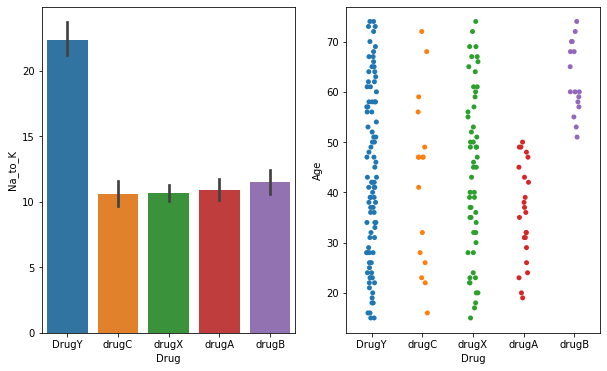

In [14]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
sns.barplot(data['Drug'],data['Na_to_K'],ax=ax[0])
sns.stripplot(data['Drug'],data['Age'],ax=ax[1])

In [15]:
print(data['Age'].values.mean())
print(data['Age'].values.max())
print(data['Age'].values.min())

44.315
74
15


In [16]:
print(data[data['Age']==data['Age'].min()])
print("\n")
print(data[data['Age']==data['Age'].max()])

     Age Sex      BP Cholesterol  Na_to_K   Drug
39    15   M  NORMAL        HIGH    9.084  drugX
99    15   F    HIGH      NORMAL   16.725  DrugY
121   15   M    HIGH      NORMAL   17.206  DrugY


     Age Sex    BP Cholesterol  Na_to_K   Drug
13    74   F   LOW        HIGH   20.942  DrugY
31    74   M  HIGH        HIGH    9.567  drugB
135   74   M   LOW      NORMAL   11.939  drugX
143   74   M  HIGH      NORMAL   15.436  DrugY


In [17]:
print(data['Drug'].unique())

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [18]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
drugs_train_df = data.copy()
drugs_train_df['Sex'] = labelEncoder.fit_transform(drugs_train_df['Sex'])
print(drugs_train_df.loc[0:5,"Sex"])
print(data.loc[0:5,"Sex"])

0    0
1    1
2    1
3    0
4    0
5    0
Name: Sex, dtype: int64
0    F
1    M
2    M
3    F
4    F
5    F
Name: Sex, dtype: object


In [19]:
bp_labels = {"HIGH":2 , "NORMAL":1 , "LOW":0}
print(drugs_train_df['BP'].unique())
drugs_train_df['BP'] = drugs_train_df['BP'].map(bp_labels)
print(drugs_train_df['BP'].unique())

['HIGH' 'LOW' 'NORMAL']
[2 0 1]


In [20]:
chol_labels = {"HIGH":1,"NORMAL":0}
print(drugs_train_df['Cholesterol'].unique())
drugs_train_df['Cholesterol'] = drugs_train_df['Cholesterol'].map(chol_labels)
print(drugs_train_df['Cholesterol'].unique())

['HIGH' 'NORMAL']
[1 0]


In [21]:
drugs_train_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,DrugY


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
test_lab = {'DrugY':3, 'drugC':2, 'drugX':4, 'drugA':0, 'drugB':1}
X = drugs_train_df.drop("Drug",axis=1)
y = drugs_train_df['Drug']

y = y.map(test_lab).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
    
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 5)
(140, 5)
(60, 5)
(60, 5)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(units=10,activation = "relu",input_shape = (5,)))
model.add(Dropout(0.1))
model.add(Dense(units=20,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units=30,activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units=50,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(5,activation ="sigmoid"))
model.summary()

2021-09-16 10:14:55.089655: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-09-16 10:14:55.238185: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3699850000 Hz
2021-09-16 10:14:55.239233: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55cda3f7afb0 executing computations on platform Host. Devices:
2021-09-16 10:14:55.239299: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1

In [31]:
opt = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=200,batch_size=32,validation_data=(X_test,y_test),verbose=0)
df_history = pd.DataFrame(history.history)
model.save(filepath="Models/drug-class.h5")

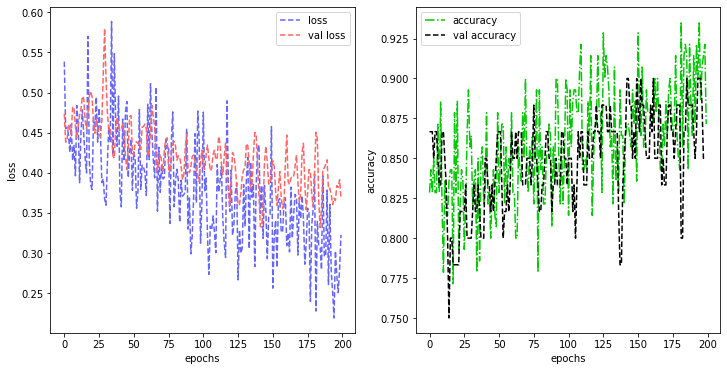

In [32]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].plot(range(0,len(df_history['loss'])),df_history['loss'] ,color="#6666ff",ls="--",label="loss")
ax[0].plot(range(0,len(df_history['val_loss'])),df_history['val_loss'] ,color="#ff6666",ls="--",label="val loss")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(range(0,len(df_history['accuracy'])),df_history['accuracy'] ,color="#05c705",ls="-.",label="accuracy")
ax[1].plot(range(0,len(df_history['val_accuracy'])),df_history['val_accuracy'] ,color="#000000",ls="--",label="val accuracy")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()

In [33]:
print(model.evaluate(X_test,y_test))

60/60 [==============================] - 0s 25us/sample - loss: 0.3682 - accuracy: 0.8500
[0.36817561785380043, 0.85]
